<img src="https://matplotlib.org/_static/logo2_compressed.svg" width="25%" height="25%" />

# Matplotlib - Unit 02 - Matplotlib Plots Part 01

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Learn and use Matplotlib for line plot, histograms, boxplot and Scatter plot



---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # used for loading datasets

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Matplotlib Plots - Part 01

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> In our last unit, we learned how to use `plt.plot()` to plot data in x and y axis.
* We will study more examples in this unit.
  * However we will not be interested to study this unit in detail, to set and customize plot parameters, like title, axis, grid, color. We will leave this to the next unit
  * At the same time, there will be cases in this unit where we will introduce little customization to better present the examples

* We will study the following plot types in this unit:
  * Line Plot
  * Histogram
  * Boxplot
  * Scatter Plot
  * Areaplot
  * Bar plot
  * Pie chart
  * 3D Plot
  * Images


* The matplotlib gallery with documented use cases can be found [here](https://matplotlib.org/stable/gallery/index.html)

We will consider NumPy arrays and Pandas DataFrames (loaded from Seaborn dataset's library)

import seaborn as sns
sns.get_dataset_names()

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Line Plot

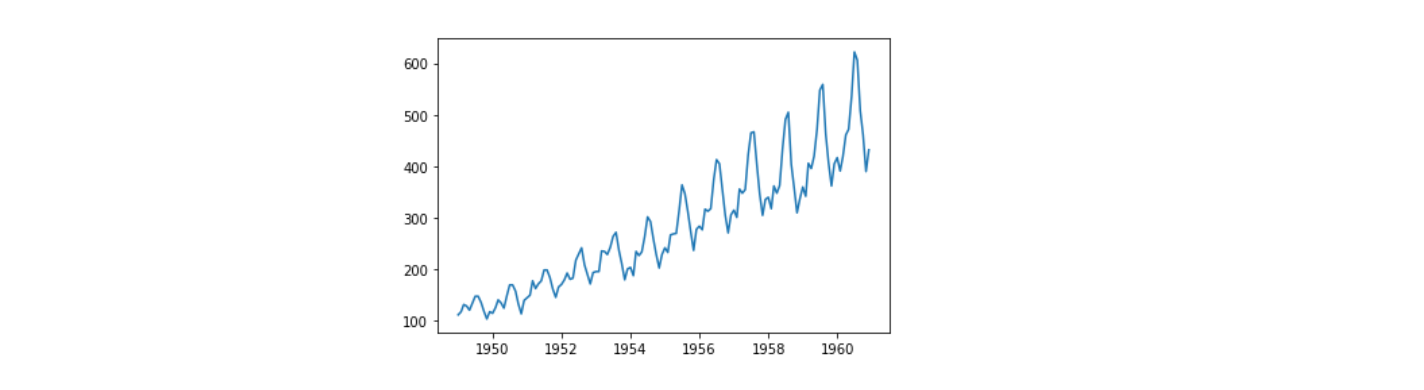

In the previous unit we showed an example using `plt.plot() ` with NumPy array data. Matplotlib handles data structure either with NumPy or Pandas. The next example will consider Pandas.
  * Consider `flights` dataset from Seaborn

df = sns.load_dataset('flights').head(50)
print(df.shape)
df.head()

We process the variables, so at the end the `index` is a date type and is in a nice format.

df['year'] = df['year'].astype('str')
df['month'] = df['month'].astype('str')
df['Date'] = pd.to_datetime(df['month'] + '-' + df['year'] )
df.set_index('Date',inplace=True)
df.head()

We plot the passengers level. The x-axis, when not stated explicitly, is the index.

plt.plot(df['passengers'])
plt.show()

We are now interested to plot multiple variables in the same line plot.
  * First this we will generate some data using `np.random.randn()`, where the number of values is the number of rows in the DataFrame - note `df.shape[0]`

np.random.seed(100)
df['Col1'] = 300 + 20 * np.random.randn(df.shape[0])
df.head()

Using `plt.plot()`, we subset both variables.
  * In this case bracket notation was used, but you could use any approach you learned so far (like `.filter()`)

plt.plot(df[['passengers','Col1']])
plt.show()

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Histograms

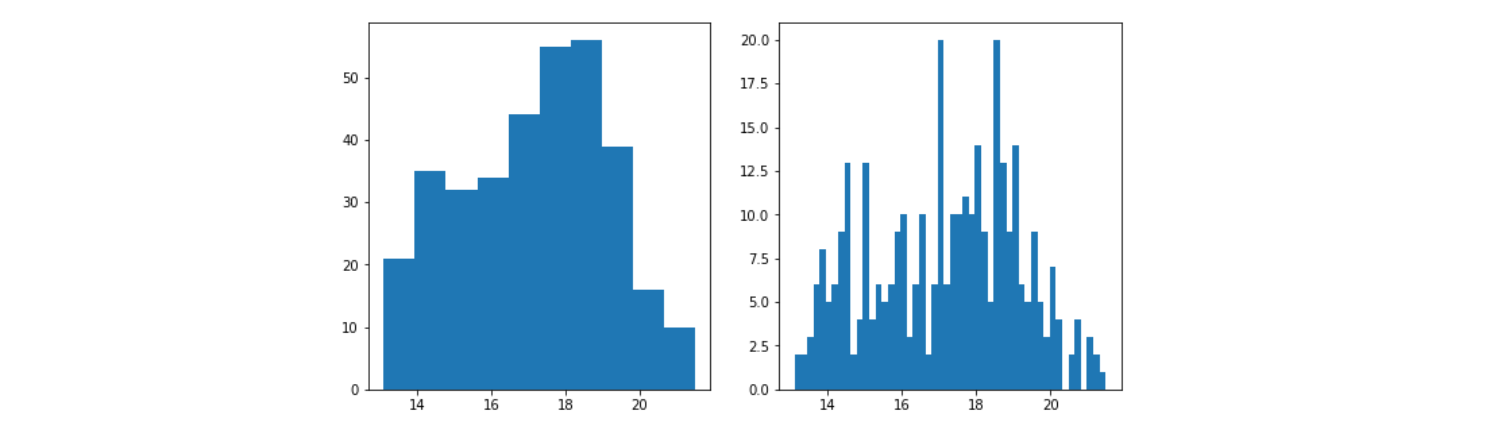

We use `plt.hist()` to plot histograms in Matplotlib. The documentation can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
* Let's consider the penguins dataset. It has records for 3 different species of penguins, collected from 3 islands in the Palmer Archipelago, Antarctica

df = sns.load_dataset('penguins')
df = df.sample(n=50, random_state=1)
df.head(3)

* In `plt.hist()` you will parse the following arguments:
  * `data`, which is, in this case, the DataFrame. It could be your array
  * `x`, which is the variable
  * bins, it is the buckets where your data will be groupped

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axes[0].hist(data=df, x='bill_depth_mm')
axes[1].hist(data=df, x='bill_depth_mm', bins=50)
plt.show()

In case you wish to plot multiple variables in a Matplotlib histogram, you can loop over your variables using `plt.hist()`
* Then you add `plt.legend()`, so a legend is added to the Figure. The function documentation is found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)
* Finally you plot the Figure with `plt.show()`

for col in ['bill_length_mm','bill_depth_mm']:
  plt.hist(data=df,x=col,label=col)
plt.legend()
plt.show()

# using loop + subplot to plot figure above
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
i=0
for col in ['bill_length_mm','bill_depth_mm']:
    axes[i].hist(data=df,x=col,label=col, bins=50)
    i += 1
plt.legend()
plt.show()

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Boxplot

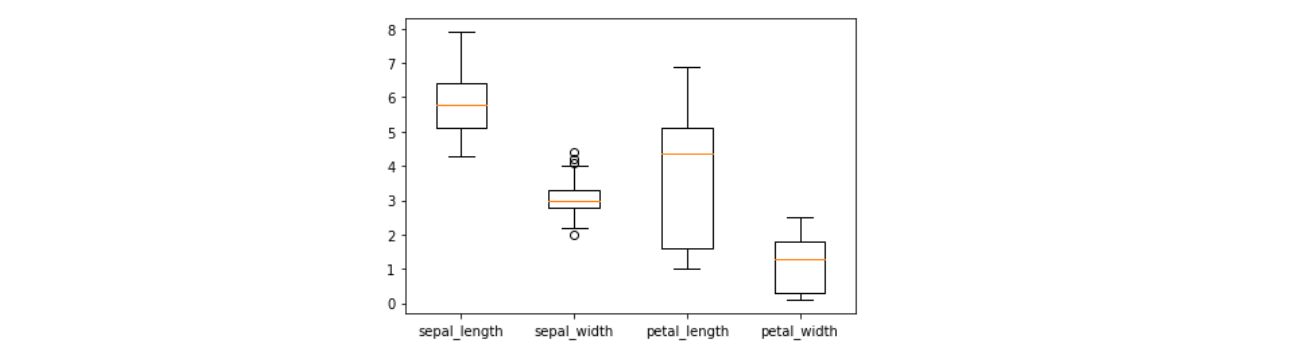

We will consider the iris dataset for delivering a boxplot. This dataset contains records of 3 classes of iris plants, with its petal and sepal measurements.



df = sns.load_dataset('iris')
df = df.sample(n=50, random_state=1)
df.head(3)

We will use `plt.boxplot()`. The documentation can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)
* Ther arguments are data, where you parse the dataset, and x, where you inform the variable you want the boxplot.

plt.boxplot(data=df,x='sepal_length')
plt.show()

You can use `plt.xticks()` to set the ticks on x axis. The documentation is found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html)
* In the cell below we are plotting multiple variables, we set them in a list col_boxplot.
* In a loop, we append the content of each variable to another list. This list will be used to plot the data in a boxplot.
* Finally we set the variables name in the x axis with `plt.xticks()`  



list_of_data = []
col_boxplot = ['sepal_length',	'sepal_width','petal_length',	'petal_width'	]
for col in col_boxplot:
  list_of_data.append(df[col])

plt.boxplot(x=list_of_data)
plt.xticks(np.arange(1,len(col_boxplot)+1), col_boxplot)
plt.show()


print(np.arange(1,len(col_boxplot)+1))

<img width="3%" height="3%" align="top"  src=" https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Challenge%20test.png
">
 At first, this code may look too difficult to plot a boxplot using multiple variables. And you are right; there are alternative ways to do this task. The idea here is to present the numerous existing alternatives when deciding to pick your tool for a particular use case in the workplace.

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Scatter Plot

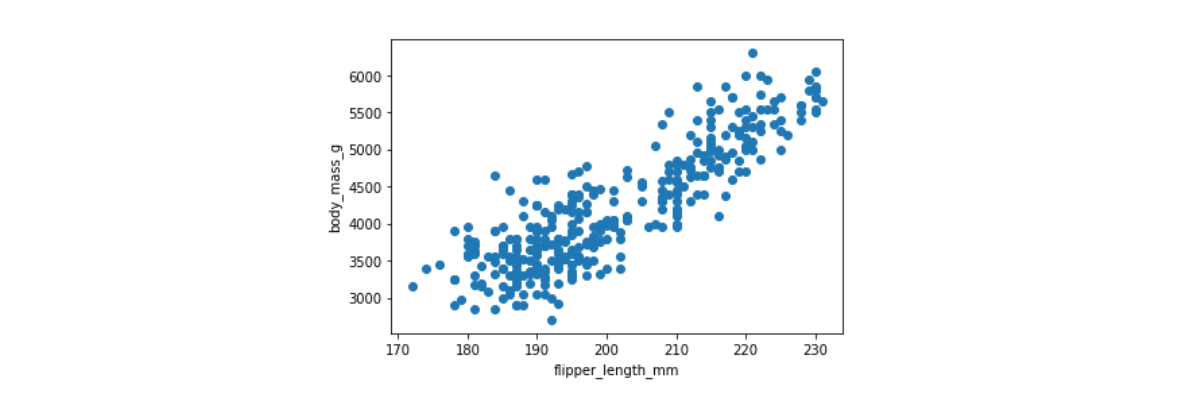

We are using the penguins dataset for this exercise. It has records for 3 different species of penguins, collected from 3 islands in the Palmer Archipelago, Antarctica

df = sns.load_dataset('penguins')
df = df.sample(n=50, random_state=1)
df.head()

We use `plt.scatter()` to plot a scatter plot in Matplotlib. The documentation is found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

Let's plot a scattor plot setting `kind='scatter'`, `x='flipper_length_mm'` and `y='body_mass_g'`

x, y = 'flipper_length_mm' , 'body_mass_g'
plt.scatter(data=df, x=x, y=y)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

You can add the parameter `c`, for coloring the plot based on another variable. The colormap options are found [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html). In this case, we set `c='body_mass_g'`

x, y = 'flipper_length_mm' , 'body_mass_g'
plt.scatter(data=df, x=x, y=y, c=y)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

Noe we added the parameter `s`, for size. The dots' size will be defined according to `body_mass_g` levels.

x, y = 'flipper_length_mm' , 'body_mass_g'
plt.scatter(data=df, x=x, y=y, c=y, s=y)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

You can rescale the dot's size. If you parse `s=y/60`, the code will not work, since it is a string (y) divided by a number. In this case, you should parse the array df[y], then divide by a number for scaling.

x, y = 'flipper_length_mm' , 'body_mass_g'
plt.scatter(data=df, x=x, y=y, c=y, s=df[y]/60)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : We will use the DataFrame below to practice with.

df_practice = sns.load_dataset('tips')
df_practice = df_practice.sample(n=50, random_state=1)
df_practice.head(10)

Feel free to try out your ideas or use the following suggestion.

Display total_bill and tip on one or more charts of your choice, using what you learned in this unit.

# Write your code here.
x, y = 'total_bill' , 'tip'
plt.scatter(data=df_practice, x=x, y=y)
plt.ylabel(y)
plt.xlabel(x)
plt.show()

# Write your code here
sex_mapping = {'Male': 0, 'Female': 1}
df_practice['sex']= df_practice['sex'].map(sex_mapping)

df_practice.head(10)

x, y = 'total_bill' , 'tip'
plt.scatter(data=df_practice, x=x, y=y, c='sex')
plt.ylabel(y)
plt.xlabel(x)
plt.legend()
plt.show()

sns.set_palette(sns.color_palette("husl", 2))

# Specify the columns for x and y
x, y = 'total_bill', 'tip'

# Create a scatter plot with color differentiation based on 'sex'
sns.scatterplot(data=df_practice, x=x, y=y, hue='sex')

# Set labels for x and y axes
plt.xlabel(x)
plt.ylabel(y)

# Display the legend
plt.legend(title='Sex')

# Show the plot
plt.show()

